In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',1)

In [30]:
df = pd.read_csv(r"C:\Users\ANAIKUTTY\Documents\Cricket analysis\data files\ipl_2008_2024_ball_by_ball_data.csv")

In [31]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['season'] = df['start_date'].dt.year

In [32]:
df['isdot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
df['isone'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
df['isthree'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
df['istwo'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
df['isfour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
df['issix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)

In [33]:
msd = df[df['striker'] == 'MS Dhoni']

TOTAL RUNS

In [34]:
sum(msd['runs_off_bat'])

5243

TOTAL AVERAGE

In [35]:
print(sum(msd['runs_off_bat']) / msd['player_dismissed'].count())

35.18791946308725


STRIKE RATE

In [36]:
print(100* sum(msd['runs_off_bat']) / msd['ball'].count())

132.8350646060299


FOURS AND SIXES

In [51]:
print("Total Fours",sum(msd['isfour']))
print("Total sixes",sum(msd['issix']))

Total Fours 363
Total sixes 252


In [38]:
df = df[(df['season'] >= 2022) & (df['season']<= 2024)]

In [39]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Source_File,isdot,isone,isthree,istwo,isfour,issix
71444,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,0.1,Chennai Super Kings,Kolkata Knight Riders,RD Gaikwad,DP Conway,UT Yadav,0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1304047.csv,1,0,0,0,0,0


In [40]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'Source_File', 'isdot', 'isone', 'isthree',
       'istwo', 'isfour', 'issix'],
      dtype='object')

PHASES

In [41]:
df['phases'] = df['ball'].apply(lambda x: "Powerplay" if x < 6 else("Middle Overs" if x < 15 else "Death Overs"))

In [42]:
df = df[(df['phases'] == 'Death Overs') | (df['phases'] == 'Middle Overs')]

In [43]:
df1 = pd.DataFrame(df.groupby('striker').agg({'runs_off_bat':'sum','ball':'count'})).reset_index()

In [44]:
df1['sr'] = 100*df1['runs_off_bat'] / df1['ball']

In [45]:
df1.head()

,striker,runs_off_bat,ball,sr
0,A Badoni,616,467,131.905782
1,A Kamboj,2,2,100.000000
2,A Manohar,219,163,134.355828
3,A Mishra,19,30,63.333333
4,A Nortje,42,45,93.333333


In [46]:
df1 = df1[(df1['striker'] == 'MS Dhoni') | (df1['runs_off_bat'] >= 300) & (df1['ball'] <= 300)]

VISUALIZATIONS

HIGHEST STRIKE RATE IN MIDDLE OVERS AND DEATH OVERS

<Axes: xlabel='Strike Rate', ylabel='striker'>

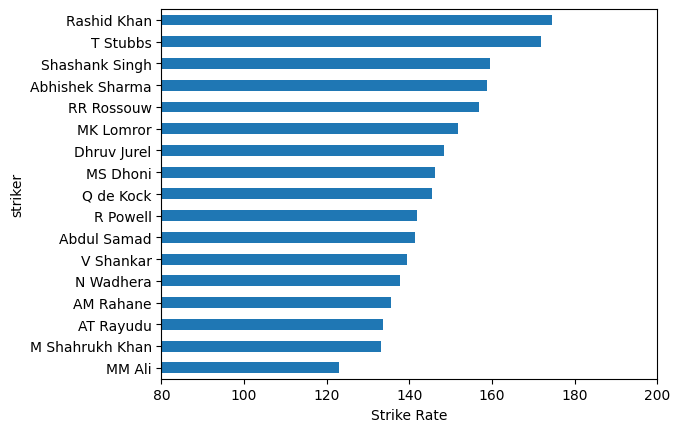

In [47]:
df1.groupby('striker')['sr'].sum().sort_values().plot(kind= 'barh',xlabel='Strike Rate',xlim=(80,200))

HIGHEST RUNS SCORED BY A BATSMAN (MIDDLE OVERS AND DEATH OVERS)

<Axes: xlabel='Runs Scored', ylabel='striker'>

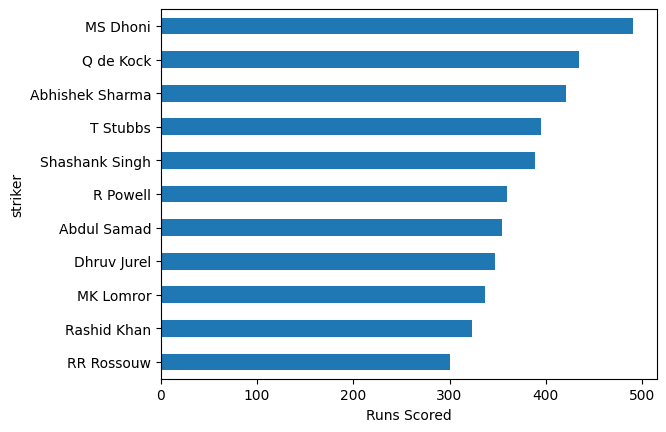

In [48]:
df1[df1['sr'] >= 140].groupby('striker')['runs_off_bat'].sum().sort_values().plot(kind= 'barh',xlabel='Runs Scored')

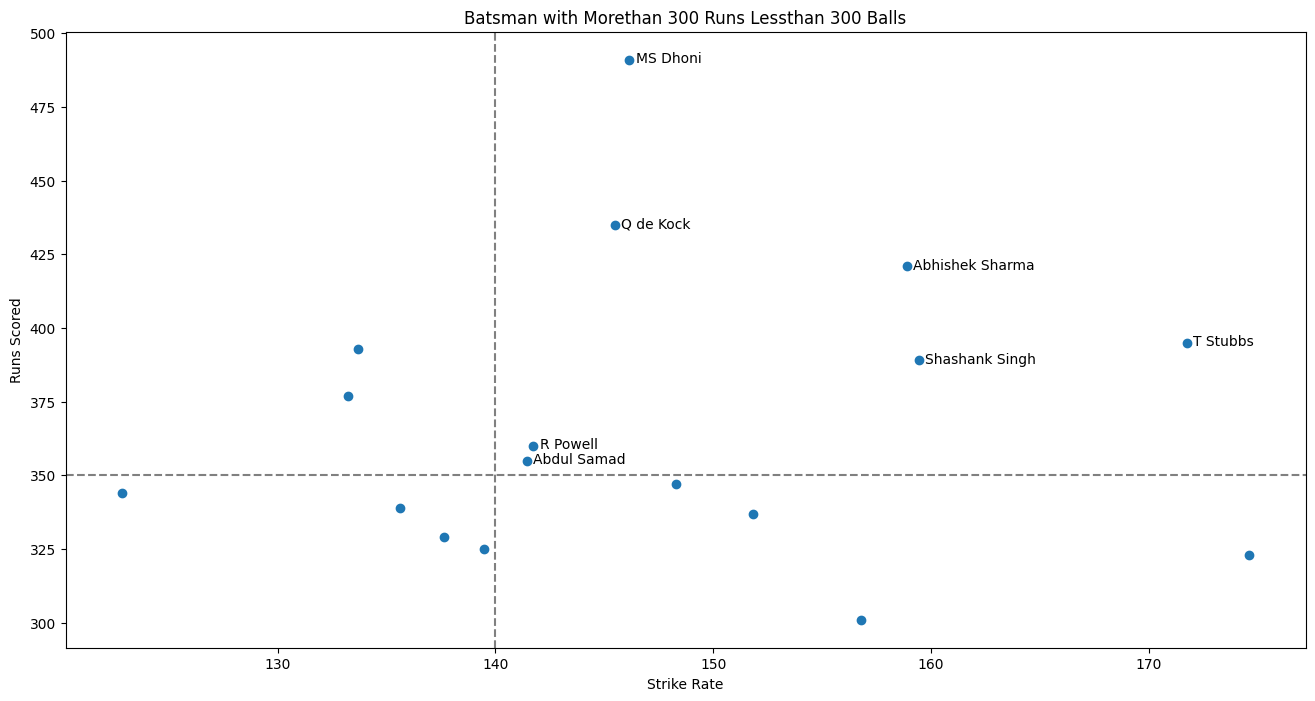

In [49]:
plt.figure(figsize=(16,8))
plt.scatter(y=df1['runs_off_bat'],x=df1['sr'])

for i in range(len(df1)):
    if ((df1['sr'].iloc[i] >=140) & (df1['runs_off_bat'].iloc[i]>=350)):
        plt.text(df1['sr'].iloc[i] +.3,df1['runs_off_bat'].iloc[i] -1,df1['striker'].iloc[i])
plt.title('Batsman with Morethan 300 Runs Lessthan 300 Balls')
plt.xlabel('Strike Rate')
plt.ylabel('Runs Scored')
plt.axvline(140,ls='--',color='grey')
plt.axhline(350,ls='--',color='grey')
plt.show()

In [50]:
#Conclusion in Analysis of MS Dhoni

#criteria :
          #1. Consider only 2022 to 2024
          #2. Consider only Middle Overs and Death Overs
          #3. Compare MS Dhoni with Finishers

#1.MS Dhoni is Ranking Top 10 in Higher StrikeRate ( Middle Overs and Death Overs)
#2.MS Dhoni is Top Batter to score Most runs in Death and Middle Overs with 140+ Strike rate
#3.MS Dhoni is one of the Top 6 six batsman who fullfill our Criteria

#MSDHONI is all set to compete in TATA IPL 2025 